<center><font size = "10"> Week 12 - Network Simulation III <center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member 1: Laura TESTA
<br>Group member 2: Alice ALBRECHT
<br>Group member 3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignments to be delivered by next Monday before 23:59.

# <font color= 'red'>Ex 1:</font>  Simple network simulation

<font size='3'> Using the modules `NetPyNe` modules `specs` and `sim`, create a simple network of soma neurons with 3 populations of 10 pyramidal cells each, using the standard compartmental Hodgkin-Huxley type cell (HH). Use the morphological, physiological, synaptic and stimulation parameters from tutorial 01 for all the populations. Connect one of the cell populations to the other two. For the first connection (population 1 to population 2) use the connection parameters (divergence, weight, delay, synMech) from tutorial 01. For the second connection (population 1 to population 3), modify and explore the connection parameters. 
    

<font size='3'>Run a simulation of 500 ms, internal integration time steps of 0.025 ms and record steps time of 0.1 ms. Plot the raster plot of all the cells and the 2D network representation of the cell locations and connections. 
    
    
<font size='3'>What do you observe regarding the firing rates of your populations? What differences in the activity do you observe?

<font size='3'><font color= 'red'>[2.5 pts]</font>


## Step 1: Import
<font size='3'>Import the __sim__ and __specs__ modules from the __netpyne__ package, that provide functions to easily create and simulate networks.

In [1]:
from netpyne import specs, sim
import numpy as np

%matplotlib inline

--No graphics will be displayed.


## Step 2: Define network parameters

In [2]:
# Network parameters -object of class NetParams to store the network parameters
netParams = specs.NetParams()

### 2.1 Define cell populations

In [3]:
# Population parameters
netParams.popParams["cell1"] = {"cellType": "PYR", "numCells": 10, "cellModel": "HH"}
netParams.popParams["cell2"] = {"cellType": "PYR", "numCells": 10, "cellModel": "HH"}
netParams.popParams["cell3"] = {"cellType": "PYR", "numCells": 10, "cellModel": "HH"}

### 2.2 Define cell morphologies and physiology

In [4]:
## Cell property rules
cellRule = {"conds": {"cellType": "PYR"}, "secs": {}}  # cell rule dict
cellRule["secs"]["soma"] = {"geom": {}, "mechs": {}}  # soma params dict
cellRule["secs"]["soma"]["geom"] = {
    "diam": 18.8,
    "L": 18.8,
    "Ra": 123.0,
}  # soma geometry
cellRule["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.12,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
}  # soma hh mechanism
netParams.cellParams["PYRrule"] = cellRule  # add dict to list of cell params

### 2.3 Define synaptic mechanism

In [5]:
## Synaptic mechanism parameters
netParams.synMechParams["exc"] = {
    "mod": "Exp2Syn",
    "tau1": 0.1,
    "tau2": 5.0,
    "e": 0,
}  # excitatory synaptic mechanism

netParams.synMechParams["inh"] = {
    "mod": "Exp2Syn",
    "tau1": 0.6,
    "tau2": 8.5,
    "e": -75,
}  # GABA synaptic mechanism

### 2.4 Stimulation

In [6]:
# Stimulation parameters
netParams.stimSourceParams["bkg"] = {"type": "NetStim", "rate": 10, "noise": 0.5}
netParams.stimTargetParams["bkg->PYR"] = {
    "source": "bkg",
    "conds": {"cellType": "PYR"},
    "weight": 0.01,
    "delay": 5,
    "synMech": "exc",
}

### 2.5 Connectivity

In [7]:
## Cell connectivity rules
netParams.connParams["cell1->cell2"] = {  #  cell1 -> cell2 label
    "preConds": {"pop": "cell1"},  # conditions of presyn cells
    "postConds": {"pop": "cell2"},  # conditions of postsyn cells
    "divergence": 12,  # probability of connection
    "weight": 0.01,  # synaptic weight
    "delay": 5,  # transmission delay (ms)
    "synMech": "exc",
}  # synaptic mechanism


netParams.connParams["cell1->cell3"] = {  #  cell1 -> cell3 label
    "preConds": {"pop": "cell1"},  # conditions of presyn cells
    "postConds": {"pop": "cell3"},  # conditions of postsyn cells
    "divergence": 12,  # probability of connection
    "weight": 0.01,  # synaptic weight
    "delay": 5,  # transmission delay (ms)
    "synMech": "exc",
}  # synaptic mechanism

## Step 3: Simulation parameters

In [8]:
# Simulation options
simConfig = specs.SimConfig()
# object of class SimConfig to store simulation configuration

simConfig.duration = 500  # Duration of the simulation, in ms
simConfig.dt = 0.025  # Internal integration timestep to use
simConfig.verbose = False  # Show detailed messages
simConfig.recordTraces = {"V_soma": {"sec": "soma", "loc": 0.5, "var": "v"}}  # Dict with traces to record
simConfig.recordStep = 0.1  # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = "model_output_ex01"  # Set file output name
simConfig.savePickle = False  # Save params, network and sim output to pickle file
simConfig.saveJson = True

In [9]:
# Plots
simConfig.analysis["plotRaster"] = True  # Plot a raster
simConfig.analysis["plotRaster"] = {"saveFig": True}  # Plot a raster
#simConfig.analysis["plotTraces"] = {"include": [1, 2, 3]} # Plot recorded traces for this list of cells
simConfig.analysis["plot2Dnet"] = True # plot 2D visualization of cell positions and connections
simConfig.analysis["plot2Dnet"] = {"saveFig": True}

## Step 4: Create and simulate the network


Start time:  2022-05-23 21:55:57.857383

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 30 
  Done; cell creation time = 0.02 s.
Making connections...
  Number of connections on node 0: 180 
  Done; cell connection time = 0.03 s.
Adding stims...
  Number of stims on node 0: 30 
  Done; cell stims creation time = 0.00 s.
Recording 0 traces of 0 types on node 0

Running simulation using NEURON for 500.0 ms...
  Done; run time = 0.35 s; real-time ratio: 1.42.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 30
  Connections: 210 (7.00 per cell)
  Spikes: 391 (26.07 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 0.35 s
Saving output as model_output_ex01_data.json ... 
Finished saving!
  Done; saving time = 0.09 s.
Preparing spike data...
Plotting raster...
Plotting 2D representation of network cell locations and connections...


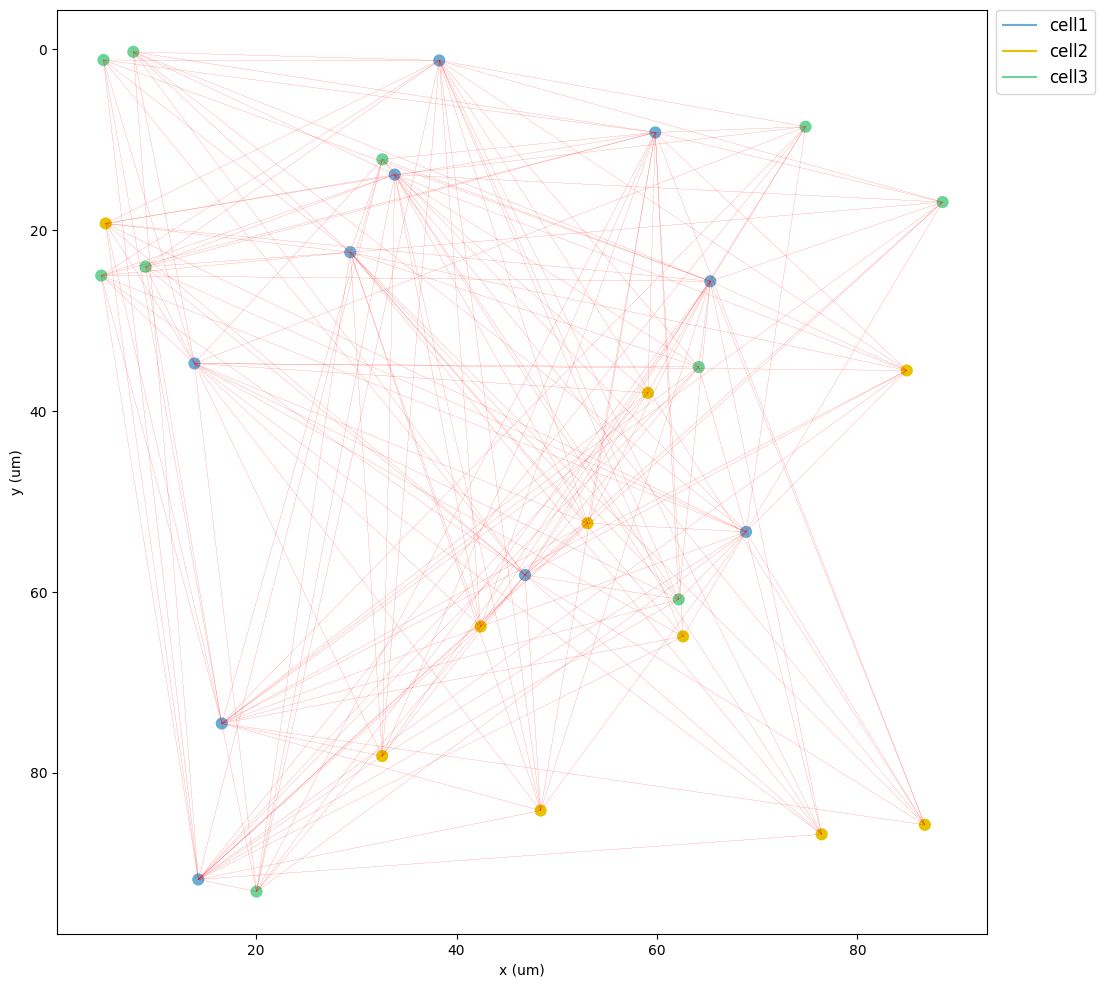

  Done; plotting time = 1.47 s

Total time = 1.98 s


In [10]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

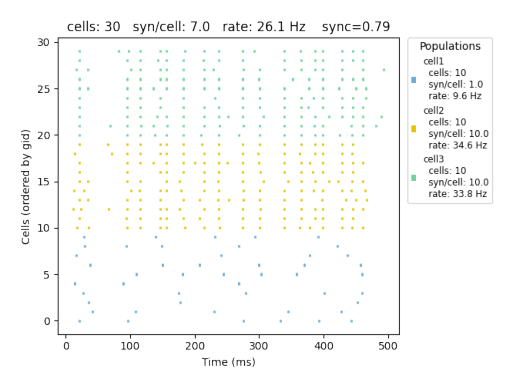

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('model_output_ex01_raster.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

Note: The raster plot is not shown here but we sent you the resulting plot in annexe to this homework. 

- On both plots, we don't see changes if we increase the divergence (tried 30 and 80) but obvious changes in 2D plot if we decrease it (tried 3). [C'est quoi du coup les changement dans le 2D plot ?] On the Raster plot, there is a drecrease in the firing rate since there are less synapses if we decrease the divergence.
- We don't see any change if we change the weigth on the 2D plot but changes on the raster plot, the firing frequency of the cells from population 3 is lower for a higher value of weight (rate decreased by a factor 2 if weigth increased by a factor 10)
- We don't see any change on the 2D plot if we increase the delay from 5 ms to 50 ms and a very slight decrease of the firing rate on the Raster plot.
- Finally, if we change the type of synapse from excitatory to inhibitory : on the 2D plot we see the same connections but some of them are now inhibitory, and on the raster plot we can see a very strong decrease of the firing rate of the population 3 cells (goes from 33,8 Hz to 4 Hz)


# <font color= 'red'>Ex 2: </font>Mouse cortical network simulation

<font size='3'>Following the line of tutorial 02, build a cortical-like network of dimensions: `x = 100 µm`, `y = 1210 µm` and `z = 100 µm`. Find the layer thickness for the mouse cortex in the paper __DeFelipe et al., 2002__ loaded in the moodle and assign these values to your model.

<font size='3'>Your network should have around 400 neurons in total. Cortical layer 1 is composed only by inhibitory cells and in the rest of the layers we can find both excitatory(E) and inhibitory(I) neurons. Extract the ratios of neurons for each layer and proportions of E/I balance from the second paper __Billeh et al. 2020.__
    
<font size='3'>Use the same morphological, physiological, synaptic and stimulation parameters from tutorial 02 for the excitatory and inhibitory cell populations. Connect the excitatory cells so they target cells within L2/3 to L6. Connect the inhibitory cells only to excitatory cells with a connection probability that decays exponentially as a function of distance `0.3*exp(-dist_3D/probLengthConst)`.
    
<font size='3'>Run a simulation of 1000 ms, internal integration time steps of 0.05 ms and record steps time of 1 ms. Plot the 2D network representation of the cell locations and connections and the connectivity matrix. 
    
<font size='3'>Based on what you learned in the lecture about the network regime map and in-silico experiments, what can you say about the activity of this cortical network? What type of activity does the network exhibit? What mechanisms have been associated with this activity, how could we attempt to change it?
    
<font size='3'><font color= 'red'>[3.5 pts]</font>

In [12]:
from netpyne import specs, sim

%matplotlib inline

## Step 2: Define network parameters - dimensions

In [13]:
# Network parameters
# object of class NetParams to store the network parameters
netParams = specs.NetParams()

netParams.sizeX = 100  # x-dimension (horizontal length) size in um
netParams.sizeY = 1210  # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 100  # z-dimension (horizontal length) size in um
netParams.propVelocity = 100.0  # propagation velocity (um/ms)
netParams.probLengthConst = 150.0  # length constant for conn probability (um)

From the first paper (Billeh et al. 2020), we extract the following thickness information for the mouse: 

- layer 1: 69µm of thickness, so located in 0-69 y axis
- layer 2/3: 235µm of thickness, so located in 69-304 y axis
- layer 4: 208µm of thickness, so located in 304-512 y axis
- layer 5: 248µm of thickness, so located in 512-760 y axis
- layer 6: 451µm of thickness, so located in 760-1211 y axis



From the second paper (deFelipe 2002), we extract the ratio of inhibitory and excitatory cells per layer by using the total number of cells used in the paper (51978 neurons). Then we multiply it by the number of cells we want in our model (400 neurons) to obtain the number of excitatry and inhibitory cells we are going to put in our model:
- layer 1: inhibitory : 999  $\dfrac{400}{51978}$ ≃ 8 cells, excitatory : 0 cells 

- layer 2/3: inhibitory : 2211 $\dfrac{400}{51978}$ ≃ 17 cells, excitatory : 12689 $\dfrac{400}{51978}$ ≃ 98 cells

- layer 4: inhibitory : 1786 $\dfrac{400}{51978}$ ≃ 14 cells, excitatory : 10254 $\dfrac{400}{51978}$ ≃ 79 cells

- layer 5: inhibitory : 1285 $\dfrac{400}{51978}$ ≃ 9 cells, excitatory : 7569 $\dfrac{400}{51978}$ ≃  58 cells

- layer 6: inhibitory : 2303 $\dfrac{400}{51978}$ ≃ 18 cells, excitatory : 12882 $\dfrac{400}{51978}$ ≃  99 cells

By additioning the number of cells per layer we indeed obtain 400 neurons.

### 2.1 Define cell populations

In [14]:
## Population parameters
# layer 1 (only inhibitory cells)
netParams.popParams["I1"] = {
    "cellType": "I",
    "numCells": 8,
    "yRange": [0, 69],
    "cellModel": "HH",
}

#layer 2/3
netParams.popParams["E2"] = {
    "cellType": "E",
    "numCells": 98,
    "yRange": [69, 304],
    "cellModel": "HH",
}
netParams.popParams["I2"] = {
    "cellType": "I",
    "numCells": 17,
    "yRange": [69, 304],
    "cellModel": "HH",
}

#layer 4
netParams.popParams["E4"] = {
    "cellType": "E",
    "numCells": 79,
    "yRange": [304, 512],
    "cellModel": "HH",
}

netParams.popParams["I4"] = {
    "cellType": "I",
    "numCells": 14,
    "yRange": [304, 512],
    "cellModel": "HH",
}

               
#layer 5
netParams.popParams["E5"] = {
    "cellType": "E",
    "numCells": 58,
    "yRange": [512, 760],
    "cellModel": "HH",
}
netParams.popParams["I5"] = {
    "cellType": "I",
    "numCells": 9,
    "yRange": [512, 760],
    "cellModel": "HH",
}
               
#layer 6
netParams.popParams["E6"] = {
    "cellType": "E",
    "numCells": 99,
    "yRange": [760, 1211],
    "cellModel": "HH",
}
               
netParams.popParams["I6"] = {
    "cellType": "I",
    "numCells": 18,
    "yRange": [760, 1211],
    "cellModel": "HH",
}

### 2.2 Define cell morphologies and physiology

In [15]:
## Cell property rules
cellRule = {"conds": {"cellType": "E"}, "secs": {}}  # cell rule dict
cellRule["secs"]["soma"] = {"geom": {}, "mechs": {}}  # soma params dict
cellRule["secs"]["soma"]["geom"] = {"diam": 15, "L": 14, "Ra": 120.0}  # soma geometry
cellRule["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.13,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
}  # soma hh mechanism
netParams.cellParams["Erule"] = cellRule  # add dict to list of cell params

cellRule = {"conds": {"cellType": "I"}, "secs": {}}  # cell rule dict
cellRule["secs"]["soma"] = {"geom": {}, "mechs": {}}  # soma params dict
cellRule["secs"]["soma"]["geom"] = {
    "diam": 10.0,
    "L": 9.0,
    "Ra": 110.0,
}  # soma geometry

cellRule["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.11,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
}  # soma hh mechanism
netParams.cellParams["Irule"] = cellRule  # add dict to list of cell params

### 2.3 Define synaptic mechanism

In [16]:
## Synaptic mechanism parameters
netParams.synMechParams["exc"] = {
    "mod": "Exp2Syn",
    "tau1": 0.8,
    "tau2": 5.3,
    "e": 0,
}  # NMDA synaptic mechanism

netParams.synMechParams["inh"] = {
    "mod": "Exp2Syn",
    "tau1": 0.6,
    "tau2": 8.5,
    "e": -75,
}  # GABA synaptic mechanism

### 2.4 Stimulation

In [17]:
# Stimulation parameters
netParams.stimSourceParams["bkg"] = {"type": "NetStim", "rate": 20, "noise": 0.3}
netParams.stimTargetParams["bkg->all"] = {
    "source": "bkg",
    "conds": {"cellType": ["E", "I"]},
    "weight": 0.01,
    "delay": "max(1, normal(5,2))",
    "synMech": "exc",
}

# Step 3.1. Cells not connected
## Run simulation


Start time:  2022-05-23 21:56:00.470520

Creating network of 9 cell populations on 1 hosts...
  Number of cells on node 0: 400 
  Done; cell creation time = 0.04 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 400 
  Done; cell stims creation time = 0.05 s.
Recording 2 traces of 1 types on node 0

Running simulation using NEURON for 1000.0 ms...
  Done; run time = 1.50 s; real-time ratio: 0.67.

Gathering data...
  Done; gather time = 0.05 s.

Analyzing...
  Cells: 400
  Connections: 400 (1.00 per cell)
  Spikes: 8058 (20.14 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 1.50 s
Preparing spike data...
Plotting raster...
  There was an exception in plotRaster(): 
    'NoneType' object has no attribute 'ax' 
    (<class 'AttributeError'>, AttributeError("'NoneType' object has no attribute 'ax'"), <traceback object at 0x7fa68c8b3600>)
Plotting recorded cell traces ... cell


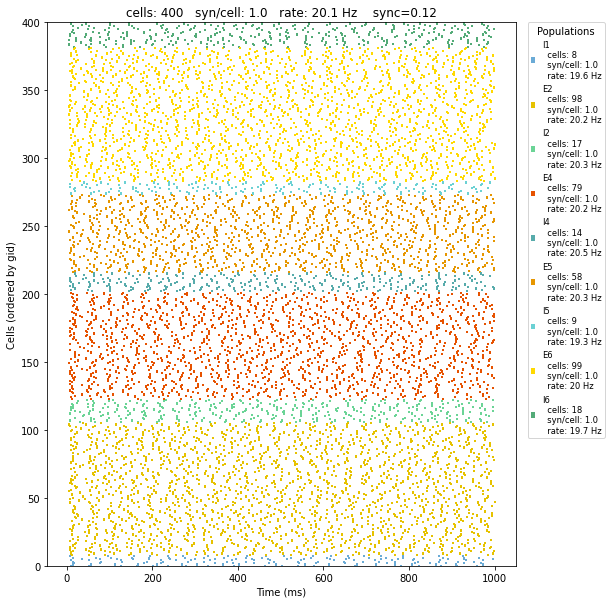

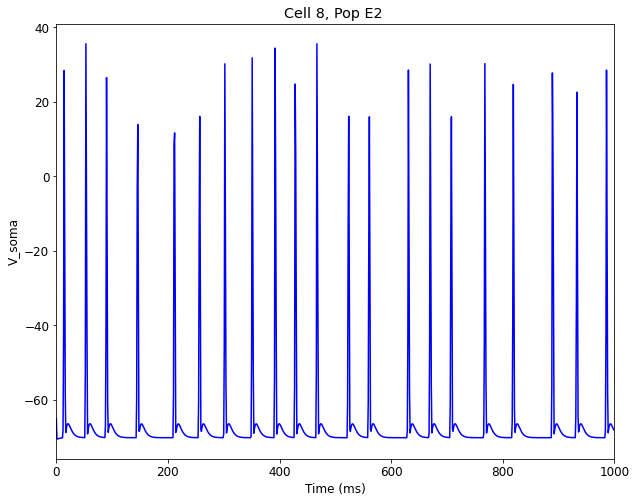

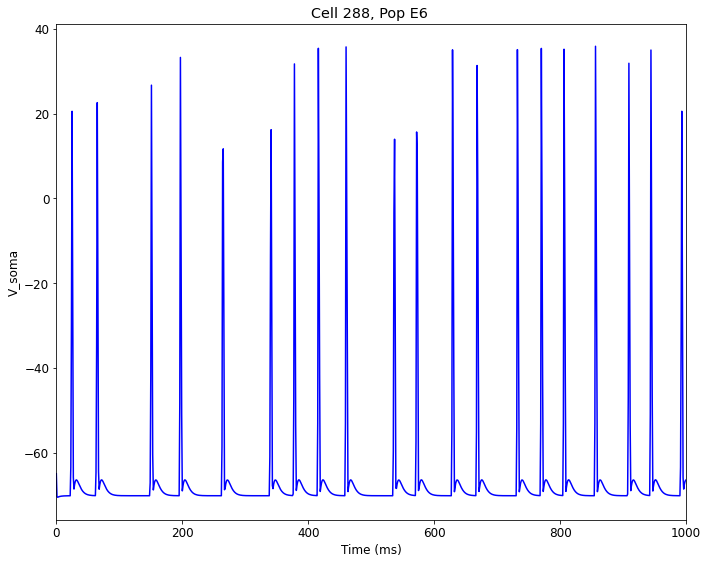

Plotting 2D representation of network cell locations and connections...


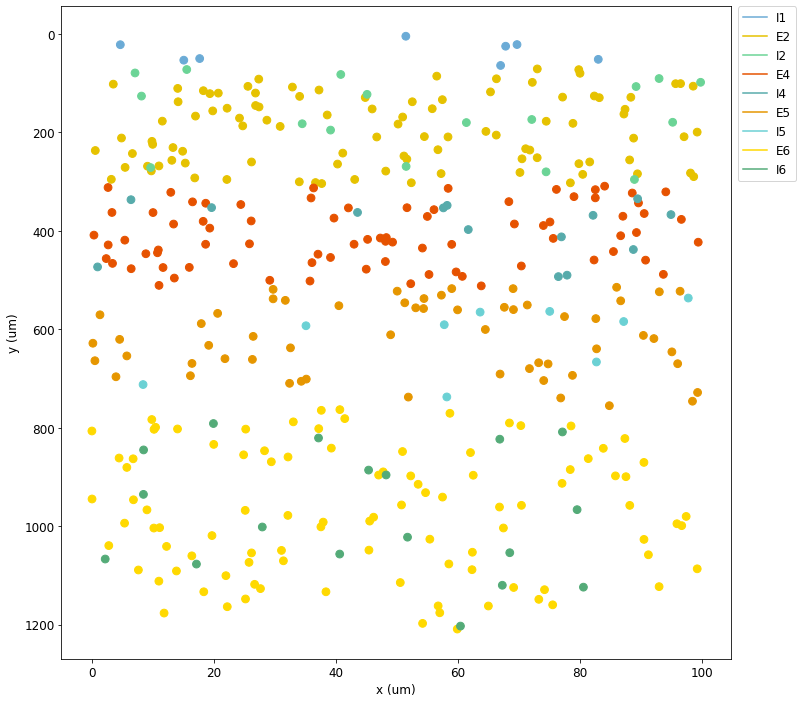

Plotting connectivity matrix...


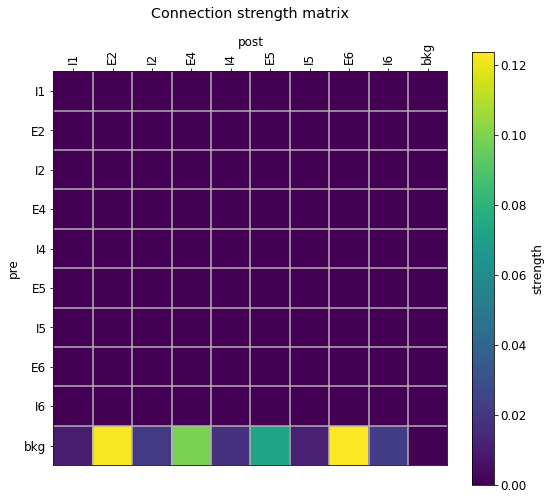

  Done; plotting time = 2.38 s

Total time = 4.03 s


In [18]:
# Simulation options
simConfig = specs.SimConfig()

simConfig.duration = 1 * 1e3  # Duration of the simulation, in ms
simConfig.dt = 0.05  # Internal integration timestep to use
simConfig.verbose = False  # Show detailed messages
simConfig.recordTraces = {
    "V_soma": {"sec": "soma", "loc": 0.5, "var": "v"}
}  # Dict with traces to record

simConfig.recordStep = 1  # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = "model_output_ex02_part1"  # Set file output name
simConfig.savePickle = False  # Save params, network and sim output to pickle file

fig, ax = plt.subplots(figsize = (10, 10))
ax.set_ylim((0, 400))
simConfig.analysis["plotRaster"] = {"orderBy": "y", "orderInverse": True,}  # Plot a raster
simConfig.analysis["plotRaster"] = {"axis" : ax, "saveFig": True}
simConfig.analysis["plotTraces"] = {"include": [("E2", 0), ("E6", 5)]}  # Plot recorded traces for this list of cells
simConfig.analysis["plot2Dnet"] = True  # plot 2D visualization of cell positions and connections
simConfig.analysis["plotConn"] = True  # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

# Step 3.2. Excitatory cells target all cells within layer 2/3 to 6



In [19]:
# excitatory cells connections
netParams.connParams["E->all"] = {
    "preConds": {"cellType": "E"},
    "postConds": {"y": [69, 1211]},  # 
    "probability": 0.1,  # probability of connection
    "weight": "0.005*post_ynorm",  # synaptic weight
    "delay": "dist_3D/propVelocity",  # transmission delay (ms)
    "synMech": "exc",
}  # synaptic mechanism

## Run simulation


Start time:  2022-05-23 21:56:04.609771

Creating network of 9 cell populations on 1 hosts...
  Number of cells on node 0: 400 
  Done; cell creation time = 0.04 s.
Making connections...
  Number of connections on node 0: 13095 
  Done; cell connection time = 1.75 s.
Adding stims...
  Number of stims on node 0: 400 
  Done; cell stims creation time = 0.05 s.
Recording 2 traces of 1 types on node 0

Running simulation using NEURON for 1000.0 ms...
  Done; run time = 12.45 s; real-time ratio: 0.08.

Gathering data...
  Done; gather time = 0.41 s.

Analyzing...
  Cells: 400
  Connections: 13495 (33.74 per cell)
  Spikes: 7099 (17.75 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 12.45 s
Preparing spike data...
Plotting raster...
  There was an exception in plotRaster(): 
    'NoneType' object has no attribute 'ax' 
    (<class 'AttributeError'>, AttributeError("'NoneType' object has no attribute 'ax'"), <traceback object at 0x7fa68c8f8e40>)
Plotting recorded cell traces ... cell


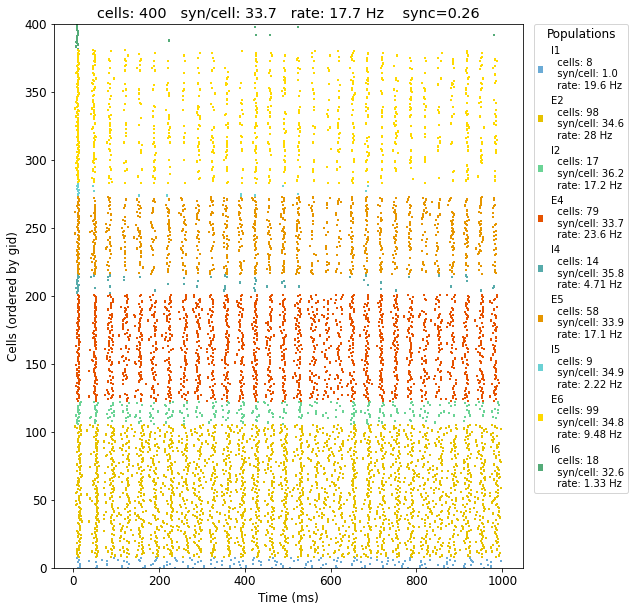

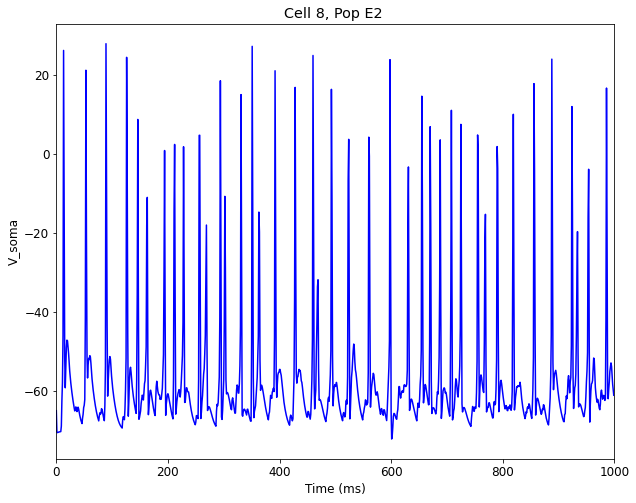

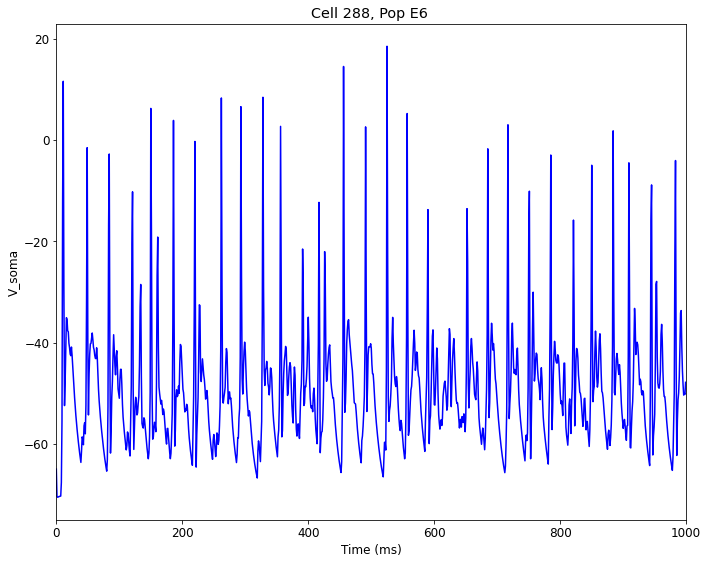

Plotting 2D representation of network cell locations and connections...


In [ ]:
# Simulation options
simConfig = specs.SimConfig()

simConfig.duration = 1 * 1e3  # Duration of the simulation, in ms
simConfig.dt = 0.05  # Internal integration timestep to use
simConfig.verbose = False  # Show detailed messages
simConfig.recordTraces = {
    "V_soma": {"sec": "soma", "loc": 0.5, "var": "v"}
}  # Dict with traces to record
simConfig.recordStep = 1  # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = "model_output_ex02_part2"  # Set file output name
simConfig.savePickle = False  # Save params, network and sim output to pickle file

fig, ax = plt.subplots(figsize = (10, 10))
ax.set_ylim((0, 400))
simConfig.analysis["plotRaster"] = {"orderBy": "y", "orderInverse": True,}  # Plot a raster
simConfig.analysis["plotRaster"] = {"axis" : ax, "saveFig": True}
simConfig.analysis["plotTraces"] = {"include": [("E2", 0), ("E6", 5)]}  # Plot recorded traces for this list of cells
simConfig.analysis["plot2Dnet"] = True  # plot 2D visualization of cell positions and connections
simConfig.analysis["plotConn"] = True  # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

# Step 3.3: Adding inhibitory connections which will project only onto excitatory cells

<font size='3'>The probability of connection decay exponential as a function of distance with a given length constant 

In [ ]:
netParams.connParams["I->E"] = {
    "preConds": {"cellType": "I"},
    "postConds": {"pop": ["E2", "E4", "E5, E6"]},  #  I -> E
    "probability": "0.3*exp(-dist_3D/probLengthConst)",  # probability of connection
    "weight": 0.001,  # synaptic weight
    "delay": "dist_3D/propVelocity",  # transmission delay (ms)
    "synMech": "inh",
}  # synaptic mechanism


## Run simulation

In [ ]:
# Simulation options
simConfig = specs.SimConfig()

simConfig.duration = 1 * 1e3  # Duration of the simulation, in ms
simConfig.dt = 0.05  # Internal integration timestep to use
simConfig.verbose = False  # Show detailed messages
simConfig.recordTraces = {
    "V_soma": {"sec": "soma", "loc": 0.5, "var": "v"}
}  # Dict with traces to record
simConfig.recordStep = 1  # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = "model_output_ex02_part3"  # Set file output name
simConfig.savePickle = False  # Save params, network and sim output to pickle file

fig, ax = plt.subplots(figsize = (10, 10))
ax.set_ylim((0, 400))
simConfig.analysis["plotRaster"] = {"orderBy": "y", "orderInverse": True,}  # Plot a raster
simConfig.analysis["plotRaster"] = {"axis" : ax, "saveFig": True}
simConfig.analysis["plotTraces"] = {"include": [("E2", 0), ("E6", 5)]}  # Plot recorded traces for this list of cells
simConfig.analysis["plot2Dnet"] = True  # plot 2D visualization of cell positions and connections
simConfig.analysis["plotConn"] = True  # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

# Step 3.4: Interpretation of the results<font size='3'> 

Based on what you learned in the lecture about the network regime map and in-silico experiments, what can you say about the activity of this cortical network? What type of activity does the network exhibit? What mechanisms have been associated with this activity, how could we attempt to change it?

From the connection matrix, we know that the excitatory neurons of layer 6 are highly connected to the exctiatory neurons from the other layers. Indeed, they are the main post synpatic neurons in our network. Indeed, the cells from layer 6 will then send their information to the other cortical areas, it is thus expected that they receive a lot of inputs from the other layers of the network.



# Optional Detailed cell morphology network

<font size='3'>Build a network with the set of morphologies assigned to your group in week 7. For each morphology you have to create a `.py` file with the morphological and biophysical characteristics for each cell. For this purpose you can use biophysics from tutorial 3 and created there files `Inh01.py` and  `Pyr01.py`

<font size='3'>Create 5 populations of cells with 5 cells each and the 3D compartmental Hodgkin-Huxley type cell (HH3D) taking care of the differences between pyramidal (E) and inhibitory cells (I). Connect the two inhibitory cell populations to the excitatory cell populations but not between them.
    
<font size='3'>Use the same synaptic and stimulation parameters used in tutorial 03. Add background stimulation to all of the neurons  with a firing rate of 100 Hz and noise level of 0.5 and connect it with a weight of 0.01 and a delay of 5 ms.  Run a simulation of 500 ms. Plot the raster plot, sample trace from each neuron populations, the 2D network representation of the cell locations and connections and the connectivity matrix.
    
<font size='3'>What can you observe? 
   